##Calculating the L2 Norm (Euclidean Distance) of a Multi-Dimensional Vector

In [ ]:
import numpy as np

# Example vector (higher-dimensional)
v = np.array([3, -4, 5, -6, 7, 8, -9])

# Compute L2 norm (Euclidean norm)
l2_norm = np.linalg.norm(v)

# Printing the result
print("Vector:", v)
print(f"L2 Norm of {v} is: {l2_norm}")

Vector: [ 3 -4  5 -6  7  8 -9]
L2 Norm of [ 3 -4  5 -6  7  8 -9] is: 16.73320053068151


##Case Study - 1 : K-Means Clustering on the Iris Dataset with L2 Norm (Euclidean Distance)

What is K-Means Clustering?

Definition: K-Means is an unsupervised machine learning algorithm used to partition data into k clusters.

Objective: Minimize the sum of squared distances (L2 norm) between data points and their assigned cluster centroids.

Role of L2 in K-Means: Used to compute the distance between data points and cluster centroids.


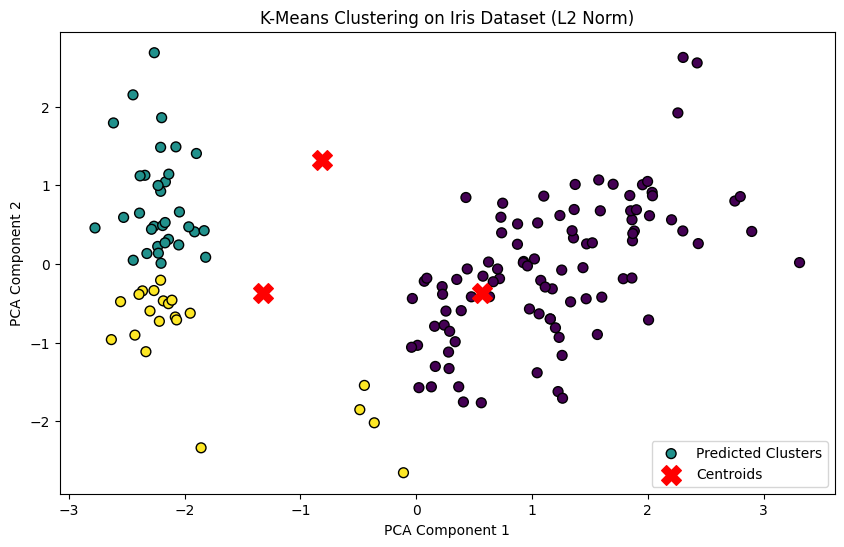

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # True labels (for comparison)

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_  # Predicted cluster labels

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', label='Predicted Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset (L2 Norm)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

###Powerfull visualization which helps us see how L2 norm works!

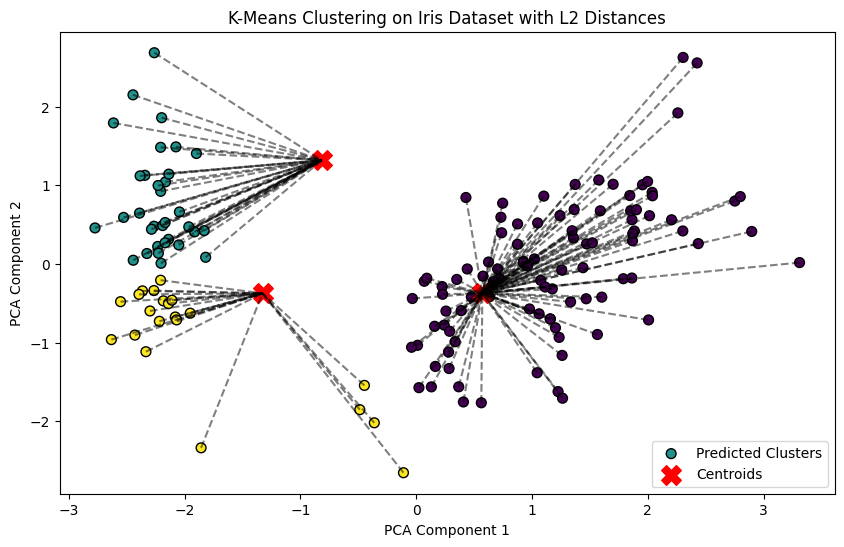

In [ ]:
# Plot the clusters with dotted lines representing L2 distances
plt.figure(figsize=(10, 6))

# Scatter plot for the data points with colors based on predicted labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', label='Predicted Clusters')

# Plot the centroids of the clusters in red
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Draw dotted lines from each point to its corresponding centroid
for i in range(len(X_pca)):
    # Get the centroid for each point's cluster
    centroid = kmeans.cluster_centers_[labels[i]]

    # Plot a dotted line from the data point to its corresponding centroid
    plt.plot([X_pca[i, 0], centroid[0]], [X_pca[i, 1], centroid[1]], 'k--', alpha=0.5)

# Add title and labels
plt.title('K-Means Clustering on Iris Dataset with L2 Distances')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


##Case Study - 2 : Image Compression

###Problem Statement :

 In image compression, we try to reduce the amount of data required to represent an image without losing too much detail

 A common method to achieve this is by using Principal Component Analysis (PCA) and L2 norms to minimize the reconstruction error between the original and compressed image.

How L2 Norm helps us in this scenario :  

The L2 norm is used to calculate the Euclidean distance between the original image's pixel values and the compressed image's pixel values.

By minimizing this distance, we retain as much of the original image information as possible while reducing storage space.


L2 Norm (Reconstruction Error): 0.0000
Original Image Size: 138.47 KB
Compressed Image Size: 28.45 KB


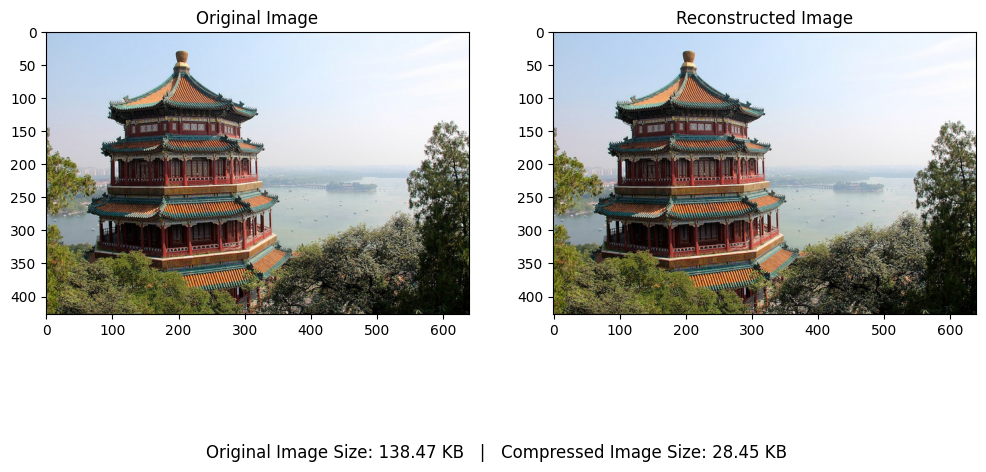

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_image
import os
import io
from PIL import Image

# Load an example image (China image from sklearn)
china = load_sample_image("china.jpg")
china = china / 255.0  # Normalize to range [0, 1]

# Reshape the image for PCA (flatten the 2D image into 1D pixels)
original_shape = china.shape
china_reshaped = china.reshape((-1, 3))  # Flatten to (num_pixels, 3)

# Apply PCA for compression (reduce to 3 components, as it's an RGB image)
pca = PCA(n_components=3)  # Maximum of 3 components for RGB image
china_compressed = pca.fit_transform(china_reshaped)
china_reconstructed = pca.inverse_transform(china_compressed)

# Reshape the compressed and reconstructed image back to 3D
china_reconstructed = china_reconstructed.reshape(original_shape)

# Save original image in memory to check its size
original_image = Image.fromarray((china * 255).astype(np.uint8))  # Convert to 8-bit image
with io.BytesIO() as byte_io:
    original_image.save(byte_io, format="JPEG", quality=95)  # Save with good quality (JPEG compression)
    original_size_kb = byte_io.tell() / 1024  # Get size in KB

# Save the compressed (reconstructed) image in memory with lower quality for compression
reconstructed_image = Image.fromarray((china_reconstructed * 255).astype(np.uint8))  # Convert back to 8-bit
with io.BytesIO() as byte_io:
    reconstructed_image.save(byte_io, format="JPEG", quality=30)  # Lower quality to compress the image
    compressed_size_kb = byte_io.tell() / 1024  # Get size in KB

# Calculate L2 norm (Euclidean distance between original and compressed image)
l2_norm = np.linalg.norm(china - china_reconstructed)

# Plot the original and reconstructed image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(china)
ax1.set_title("Original Image")
ax2.imshow(china_reconstructed)
ax2.set_title("Reconstructed Image")

# Display image size reduction
plt.figtext(0.5, 0.02, f"Original Image Size: {original_size_kb:.2f} KB   |   Compressed Image Size: {compressed_size_kb:.2f} KB", ha="center", fontsize=12)

# Print the L2 norm (Reconstruction error)
print(f"L2 Norm (Reconstruction Error): {l2_norm:.4f}")
print(f"Original Image Size: {original_size_kb:.2f} KB")
print(f"Compressed Image Size: {compressed_size_kb:.2f} KB")

plt.show()

#Case Study - 3 : K nearest neighbours

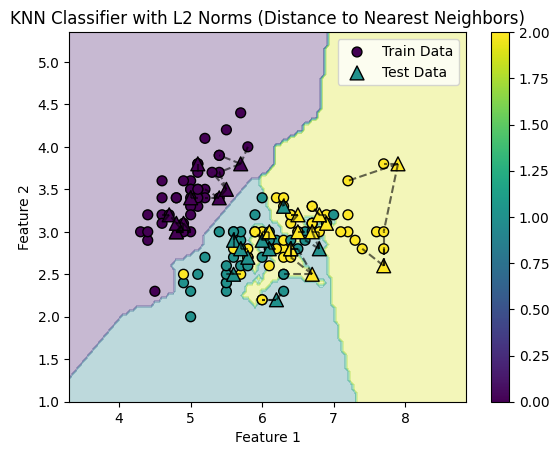

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset (using only the first two features for easy 2D visualization)
iris = load_iris()
X = iris.data[:, :2]  # First two features
y = iris.target

# Split the data into training and testing sets (using a smaller test set for better visualization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply KNN with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict on the meshgrid for decision boundaries
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot training and testing data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train Data', edgecolors='k', s=50)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', label='Test Data', edgecolors='k', s=100)

# Calculate and display L2 norms (distances to nearest neighbors) for the test points
for i in range(len(X_test)):
    # Get the 3 nearest neighbors
    distances, indices = knn.kneighbors([X_test[i]])

    # Calculate the L2 norm for the distance from the test point to the neighbors' centers
    for j in range(len(distances[0])):
        neighbor = X_train[indices[0][j]]
        plt.plot([X_test[i, 0], neighbor[0]], [X_test[i, 1], neighbor[1]], 'k--', alpha=0.6)  # Dotted lines showing L2 distance

# Title and labels
plt.title("KNN Classifier with L2 Norms (Distance to Nearest Neighbors)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="best")
plt.colorbar()
plt.show()